In [1]:
import sys # required for relative imports in jupyter lab
sys.path.insert(0, '../') 

from cosmosis.model import FFNet
from dataset import SKmake, QM7, QM7b, QM7X, QM9, ANI1x
from learning import Learn, Selector

from torch.optim import Adam
from torch.nn import MSELoss, L1Loss
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [ ]:
model_params = {'D_in': 128, 
                'H': 512, 
                'D_out': 1, 
                'model_name': 'funnel'}

ds_params = {'make': 'make_regression',
             'make_params': {'n_samples': 10000,
                             'n_features': 128}}

opt_params = {'lr': 0.01}
crit_params = {'reduction': 'sum'}
sample_params = {'set_seed': 88,
                 'splits': (.15,.7)}
sched_params = {'factor': .5,
                'patience': 2}

l = Learn(SKmake, FFNet, Selector, Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=MSELoss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=256, epochs=10)

<class 'dataset.QM7'> dataset created...
epoch: 0 of 100, train loss: 1496.1226825222088, val loss: 1259.4947479283437, lr: 0.01
epoch: 10 of 100, train loss: 129.85408727990256, val loss: 224.8237628340721, lr: 0.01
epoch: 20 of 100, train loss: 94.46459243694942, val loss: 192.41545218229294, lr: 0.01
epoch: 30 of 100, train loss: 67.09001038471858, val loss: 86.08327251672745, lr: 0.005
epoch: 40 of 100, train loss: 72.36782350142796, val loss: 75.82477515935898, lr: 0.0025
epoch: 50 of 100, train loss: 64.04120006163915, val loss: 66.04951572418213, lr: 0.00125
epoch: 60 of 100, train loss: 60.414904468589356, val loss: 81.08190965652466, lr: 0.000625
epoch: 70 of 100, train loss: 53.565184864732956, val loss: 74.28045684099197, lr: 0.000625
epoch: 80 of 100, train loss: 57.76667150523927, val loss: 61.785157680511475, lr: 0.0003125
epoch: 90 of 100, train loss: 52.456642773416306, val loss: 62.914492189884186, lr: 0.00015625
test loss: 60.63976430892944
y_pred:
tensor([[-1257.5405

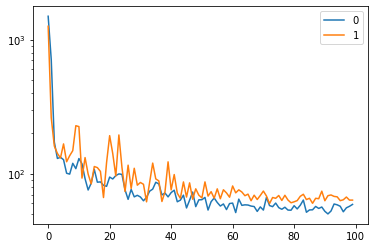

learning time: 0:01:12.227041


In [5]:
model_params = {'D_in': 23*23+23*23+23*32, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel'}

ds_params = {'features': ['distance','coulomb'],
             'targets': ['ae'],
             'embed': [('atoms',7,32,0,True)],
             'in_file': './data/qm7/qm7.mat'}

crit_params = {'reduction': 'sum'}
sample_params = {'set_seed': 88,
                 'splits': (.15,.7)}
sched_params = {'factor': .5,
                'patience': 10,
                'cooldown': 5}
opt_params = {'lr': 0.01}

l = Learn(QM7, FFNet, Selector, Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          adapt=False, load_model=False, load_embed=False, save_model=False, 
          batch_size=512, epochs=100)

In [ ]:
model_params = {'D_in': 23*23, 
                'H': 2048, 
                'D_out': 1, 
                'model_name': 'funnel'}

ds_params = {'features': ['coulomb'],
            'targets': ['E'],
            'in_file': './data/qm7b/qm7b.mat'}

crit_params = {'reduction': 'sum'}
sample_params = {'set_seed': 88,
                 'splits': (.15,.7)}
sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 5}
opt_params = {'lr': 0.01}

l = Learn(QM7b, FFNet, Selector, Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          adapt=False, load_model=False, load_embed=False, save_model=False, 
          batch_size=512, epochs=100)

In [ ]:
model_params = {'D_in': 23*23+23*64, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel'}

ds_params = {'features': ['distance'],
             'pad': 23,
             'targets': ['eAT'],
             'embed': [('atNUM',9,64,0,True)],
             'selector': ['opt'],
             'use_h5': False}

crit_params = {'reduction': 'sum'}
sample_params = {'set_seed': 88,
                 'splits': (.15,.7)}
sched_params = {'factor': .5,
                'patience': 10,
                'cooldown': 5}
opt_params = {'lr': 0.01}

l = Learn(QM7X, FFNet, Selector, Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          adapt=False, load_model=False, load_embed=False, save_model=False, 
          batch_size=256, epochs=100)

#find the longest molecule
#qm7x = QM7X(**ds_params)
#l = 0
#for i in qm7x.ds_idx:
#    s = qm7x[i][0].shape.numel()
#    if s > l:
#        l = s
#print(l)

In [ ]:
model_params = {'D_in': 12*12+12*12+12*12*16, 
                'H': 4096, 
                'D_out': 12, 
                'model_name': 'funnel'}

ds_params = {'n': 133885, 
             'features': ['distance','coulomb'],
             'embed': [('adjacency',4,16,0,True)], 
             'targets': ['mulliken'],
             'pad': 12, 
             'filter_on': ('n_atoms','<','13'),
             'use_pickle': 'n_atoms_less_than_13.p'}

crit_params = {'reduction': 'sum'}
sample_params = {'set_seed': 88,
                 'splits': (.15,.7)}
sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 2}
opt_params = {'lr': 0.01}

l = Learn(QM9, FFNet, Selector, Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          adapt=False, load_model=False, load_embed=False, save_model=False, 
          batch_size=128, epochs=50)

In [ ]:
model_params = {'D_in': 29*29+29*29+29*29*8, 
                'H': 8192, 
                'D_out': 1, 
                'model_name': 'funnel'}

ds_params = {'n': 133885, 
             'features': ['distance','coulomb'],
             'embed': [('adjacency',4,8,0,True)],
             'targets': ['U0'],
             'pad': 29, 
             'filter_on': False,
             'use_pickle': 'qm9.p'}

crit_params = {'reduction': 'sum'}
sample_params = {'set_seed': 88,
                 'splits': (.15,.7)}
sched_params = {'factor': .5,
                'patience': 2,
                'cooldown': 2}
opt_params = {'lr': 0.01}

l = Learn(QM9, FFNet, Selector, Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          adapt=False, load_model=False, load_embed=False, save_model=False, 
          batch_size=32, epochs=20)

In [ ]:
model_params = {'D_in': 32*63+63*63, 
                'H': 8192, 
                'D_out': 1, 
                'model_name': 'funnel',
                'padding_idx': 0}

ds_params = {'features': ['distance'],
             'targets': ['wb97x_dz.energy'],
             'embed': [('atomic_numbers',6,32,0,True)],
             'pad': 63, #length of the longest molecule in the dataset
             'criterion': None,
             'conformation': 'random',
             'in_file': './data/ani1x/ani1x-release.h5'}

crit_params = {'reduction': 'sum'}
sample_params = {'set_seed': 88,
                 'splits': (.15,.7)}
sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 5}
opt_params = {'lr': 0.01}

l = Learn(ANI1x, FFNet, Selector, Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          adapt=False, load_model=False, load_embed=False, save_model=False, 
          batch_size=128, epochs=100)